In [1]:
!pip install tensorflow

In [17]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Укажем путь к ZIP-файлу
zip_file = '/content/dataset.zip'

# Распакуем архив
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall('/content/disk')

# Посмотрим, какие файлы были извлечены
print(os.listdir('/content/disk'))

batch_size = 16

img_width = 852
img_height = 480
# Путь к каталогу с изображениями после распаковки
data_dir = '/content/disk'

# Создадим наборы данных из каталога
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Кэширование и предварительная загрузка данных
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

['building 1', 'building 2']
Found 518 files belonging to 2 classes.
Using 415 files for training.
Found 518 files belonging to 2 classes.
Using 103 files for validation.
Class names: ['building 1', 'building 2']


In [18]:
from google.colab import files

# Загрузка ZIP-файла с компьютера
uploaded = files.upload()

# Получение имени загруженного файла
file_name = next(iter(uploaded))

# Распаковка ZIP-архива
with zipfile.ZipFile("C:\\Users\\user\\Desktop\\disk\\disk.zip", 'r') as z:
    z.extractall('/content/disk')

# Путь к каталогу с изображениями после распаковки
data_dir = '/content/disk'

# Создание наборов данных из каталога
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Кэширование и предварительная загрузка данных
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


StopIteration: 

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# create model
num_classes = len(class_names)
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 480, 852, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 480, 852, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 240, 426, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 240, 426, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 120, 213, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 120, 213, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 60, 106, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 407040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    52,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,125,090 (198.84 MB)

 Trainable params: 52,125,090 (198.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 661ms/step - accuracy: 0.7035 - loss: 4.8299 - val_accuracy: 0.9612 - val_loss: 0.0886
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9886 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 1.0000 - loss: 3.2152e-04 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 1.0000 - loss: 1.8280e-04 - val_accuracy: 0.9903 - val_loss: 0.0093
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 1.0000 - loss: 1.2298e-04 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 1.0000 - loss: 4.2134e-05 -

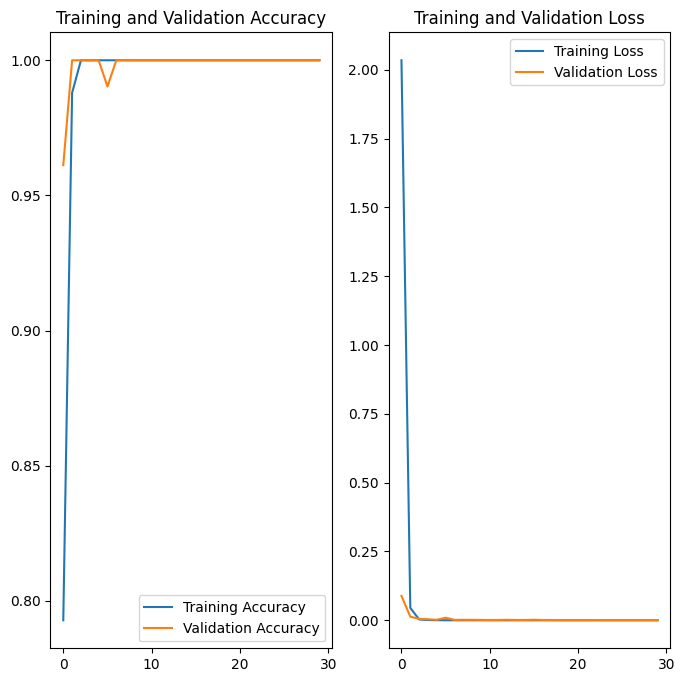

In [20]:
# train the model
epochs = 30 # количество эпох тренировки
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs)

# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model = Sequential([
    # 1. Rescaling - без experimental.preprocessing
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # 2. Аугментация - все слои из tf.keras.layers
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),

    # 3. Основные слои CNN
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # 4. Регуляризация
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 480, 852, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 480, 852, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 480, 852, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 480, 852, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 480, 852, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 480, 852, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 240, 426, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 240, 426, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 120, 213, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 120, 213, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 60, 106, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 106, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 407040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    52,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,125,090 (198.84 MB)

 Trainable params: 52,125,090 (198.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.5325 - loss: 7.1067 - val_accuracy: 0.6796 - val_loss: 0.5262
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.6554 - loss: 0.6575 - val_accuracy: 0.6796 - val_loss: 0.5319
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.6477 - loss: 0.5586 - val_accuracy: 0.7961 - val_loss: 0.3207
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.8768 - loss: 0.3134 - val_accuracy: 0.9515 - val_loss: 0.2533
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9251 - loss: 0.3077 - val_accuracy: 0.9903 - val_loss: 0.2918
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.9798 - loss: 0.2564 - val_accuracy: 0.9417 - val_loss: 0.2486
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9885 - loss: 0.2475 - val_accuracy: 1.0000 - val_loss: 0.2022
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.9821 - loss: 0.2429 - val_accuracy: 0

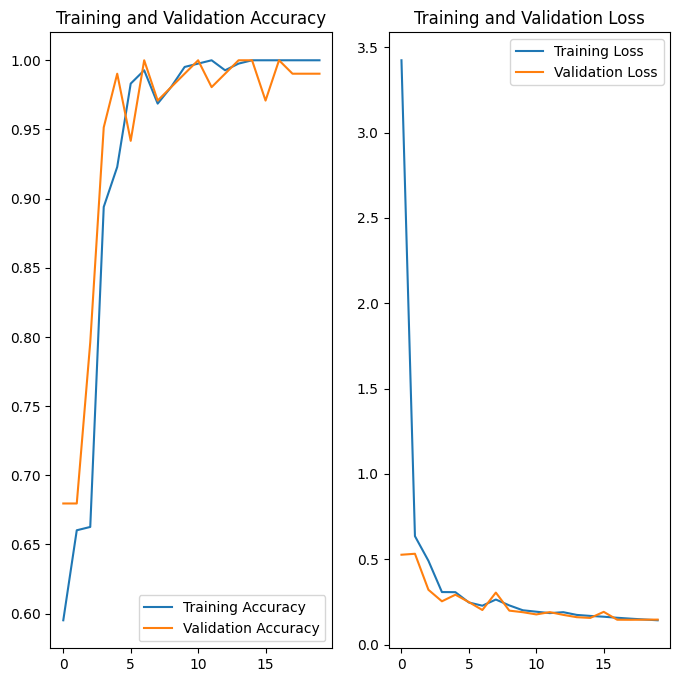

In [22]:
# train the model
epochs = 20 # количество эпох тренировки
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs)

# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
На изображении скорее всего building 1 (100.00% вероятность)


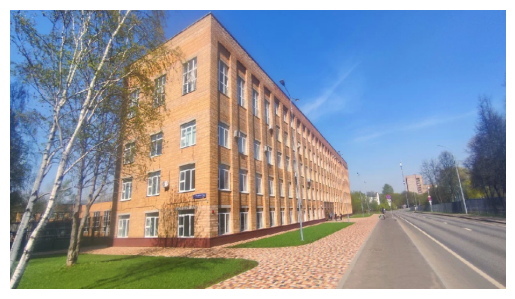

In [23]:
# Load image
brick = "/content/k1.webp"

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(
    brick, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print inference result
print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
    class_names[np.argmax(score)],
    100 * np.max(score)
))

# Show the image itself
plt.imshow(img)
plt.axis('off')
plt.show()


In [14]:
from google.colab import files

model_file_name = "trash.h5"

# save model
model.save(model_file_name)

# download model
files.download(model_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Загрузка предварительно обученной модели
model = tf.keras.models.load_model('trash.h5')

# Загрузка названий классов
class_names = ['paper', 'metal', 'plastic']  # Ваш список названий классов

# Функция для захвата фотографии с веб-камеры
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

try:
  # Захват фотографии
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Загрузка изображения
  img = cv2.imread(filename)

  # Преобразование изображения в массив numpy и изменение размера
  img_array = img
  img_array = np.expand_dims(img_array, axis=0)

  # Предсказания модели
  predictions = model.predict(img_array)

  # Получение предсказанных классов
  predicted_class = np.argmax(predictions[0])

  # Вывод результата
  print("Predicted class:", class_names[predicted_class])
  cv2.imshow("Image", img)  # Отображение изображения
  cv2.waitKey(0)  # Ожидание нажатия клавиши
  cv2.destroyAllWindows()  # Закрытие окна с изображением
except Exception as err:
  print(str(err))


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 138ms/step
Predicted class: metal
cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow

